In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cleaned_df_path = "/content/drive/My Drive/kkbox_cleaned_dataset_5M.csv"
cleaned_df = pd.read_csv(cleaned_df_path, low_memory=False)

In [ ]:
cleaned_df.drop("Unnamed: 0", axis=1, inplace=True)
cleaned_df.target = cleaned_df.target.apply(lambda x: 5 if x == 1 else 1)
print(cleaned_df.shape)
cleaned_df.head()

(5764841, 14)


,msno,song_id,source_system_tab,source_screen_name,source_type,target,bd,song_length,genre_ids,language,isrc,freq_song_playback,freq_listening_repeatitively,contain_two_others
0,7719,52187,2.0,4.0,2.0,5,2.890372,12.237920,3.0,52.0,50208,100.0,2411.0,1.0
1,16363,155609,1.0,1.0,1.0,5,3.218876,12.558787,3.0,52.0,156539,1.0,414.0,0.0
2,16363,84269,1.0,1.0,1.0,5,3.218876,12.325619,3.0,52.0,202075,2.0,414.0,0.0
3,16363,16644,1.0,1.0,1.0,5,3.218876,12.451029,3.0,1.0,50496,1.0,414.0,0.0
4,7719,23335,2.0,4.0,2.0,5,2.890372,12.143149,3.0,52.0,104378,142.0,2411.0,1.0


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764841 entries, 0 to 5764840
Data columns (total 14 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int64  
 1   song_id                       int64  
 2   source_system_tab             float64
 3   source_screen_name            float64
 4   source_type                   float64
 5   target                        int64  
 6   bd                            float64
 7   song_length                   float64
 8   genre_ids                     float64
 9   language                      float64
 10  isrc                          int64  
 11  freq_song_playback            float64
 12  freq_listening_repeatitively  float64
 13  contain_two_others            float64
dtypes: float64(10), int64(4)
memory usage: 615.8 MB


Create ***user_features_df***

In [ ]:
user_features_df = cleaned_df[['msno', 'bd', 'freq_listening_repeatitively']].drop_duplicates(subset=['msno'], keep="first")

# msno_mode_source_system_tab = cleaned_df[['msno', 'source_system_tab']].groupby("msno").source_system_tab.apply(lambda x: x.mode()).to_frame().reset_index().drop('level_1', axis=1).drop_duplicates()
# msno_mode_source_screen_name = cleaned_df[['msno', 'source_screen_name']].groupby("msno").source_screen_name.apply(lambda x: x.mode()).to_frame().reset_index().drop('level_1', axis=1).drop_duplicates()
# msno_mode_source_type = cleaned_df[['msno', 'source_type']].groupby("msno").source_type.apply(lambda x: x.mode()).to_frame().reset_index().drop('level_1', axis=1).drop_duplicates()

msno_mode_source_system_tab = cleaned_df[['msno', 'source_system_tab']].groupby("msno").source_system_tab.apply(lambda x: x.median()).to_frame().reset_index()
msno_mode_source_screen_name = cleaned_df[['msno', 'source_screen_name']].groupby("msno").source_screen_name.apply(lambda x: x.median()).to_frame().reset_index()
msno_mode_source_type = cleaned_df[['msno', 'source_type']].groupby("msno").source_type.apply(lambda x: x.median()).to_frame().reset_index()

user_features_df = user_features_df.merge(msno_mode_source_system_tab, on="msno", how="left")
user_features_df = user_features_df.merge(msno_mode_source_screen_name, on="msno", how="left")
user_features_df = user_features_df.merge(msno_mode_source_type, on="msno", how="left")

user_features_df

,msno,bd,freq_listening_repeatitively,source_system_tab,source_screen_name,source_type
0,7719,2.890372,2411.0,2.0,4.0,3.0
1,16363,3.218876,414.0,1.0,1.0,0.0
2,26590,3.295837,506.0,1.0,1.0,0.0
3,2510,2.890372,186.0,1.0,1.0,0.0
4,14128,2.890372,240.0,1.0,1.0,1.0
...,...,...,...,...,...,...
29133,18323,2.890372,7.0,0.0,4.0,3.0
29134,12575,2.890372,1.0,1.5,4.0,3.0
29135,23160,2.890372,0.0,0.0,4.0,3.0
29136,24403,2.890372,3.0,0.0,4.0,2.0


Create ***song_features_df***

In [ ]:
song_features_df = cleaned_df[['song_id', 'genre_ids', 'song_length', 'freq_song_playback', 'language']].drop_duplicates(subset="song_id", keep="first")
# song_features_df
for category in [0, 1, 2, 3, 4]:
  song_features_df[f"genre_ids_{category}"] = np.where(song_features_df.genre_ids == category, 1, 0)
song_features_df.drop("genre_ids", inplace=True, axis=1)
song_features_df

,song_id,song_length,freq_song_playback,language,genre_ids_0,genre_ids_1,genre_ids_2,genre_ids_3,genre_ids_4
0,52187,12.237920,100.0,52.0,0,0,0,1,0
1,155609,12.558787,1.0,52.0,0,0,0,1,0
2,84269,12.325619,2.0,52.0,0,0,0,1,0
3,16644,12.451029,1.0,1.0,0,0,0,1,0
4,23335,12.143149,142.0,52.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5763998,24374,12.524210,0.0,1.0,0,0,0,1,0
5764372,70071,12.407280,0.0,52.0,0,0,0,1,0
5764373,215491,12.407280,0.0,52.0,0,0,0,1,0
5764455,119997,12.329833,0.0,1.0,0,0,0,1,0


Create ***interactions_df***

In [ ]:
interactions_df = cleaned_df[['msno', 'song_id', 'target']]
interactions_df

,msno,song_id,target
0,7719,52187,5
1,16363,155609,5
2,16363,84269,5
3,16363,16644,5
4,7719,23335,5
...,...,...,...
5764836,3992,130696,5
5764837,17312,247000,1
5764838,17312,36030,5
5764839,1151,71554,5


# Apply with Lightfm

In [ ]:
!pip install lightfm
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm import evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808328 sha256=2496f0231a13b0d45593340340954fdba935e3751735d114825b0d5490f110a9
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
# building user_movie_interaction_matrix
dataset = Dataset(user_identity_features=False, item_identity_features=False)
dataset.fit(interactions_df['msno'].unique(), interactions_df['song_id'].unique())
interactions, weights = dataset.build_interactions(((item['msno'], item['song_id'], item['target']) for index, item in interactions_df.iterrows()))

In [ ]:
# build user_features_matrix
user_features = user_features_df.columns[1:].tolist()
users = user_features_df['msno'].tolist()
dataset.fit_partial(users=tuple(users), user_features=tuple(user_features))
user_features_matrix = dataset.build_user_features(((user['msno'], {f:user[f] for f in user_features}) for index, user in user_features_df.iterrows()))

In [ ]:
# build song_features_matrix
song_features = song_features_df.columns[1:].tolist()
songs = song_features_df['song_id'].tolist()
dataset.fit_partial(items=tuple(songs), item_features=tuple(song_features))
song_features_matrix = dataset.build_item_features(((song['song_id'], {f:song[f] for f in song_features}) for index, song in song_features_df.iterrows()))

In [ ]:
# mapping
user_mapping, user_feature_mapping, song_mapping, song_feature_mapping = dataset.mapping()
user_inv_mapping = {v: k for k, v in user_mapping.items()}
song_inv_mapping = {v: k for k, v in song_mapping.items()}

In [ ]:
from lightfm import cross_validation
train_interactions, test_interactions = cross_validation.random_train_test_split(interactions, test_percentage=0.25, random_state=42)
train_weights, test_weights = cross_validation.random_train_test_split(weights, test_percentage=0.25, random_state=42)

In [ ]:
model = LightFM(loss='logistic')
model.fit(train_interactions,
          sample_weight=train_weights,
          item_features=song_features_matrix,
          user_features=user_features_matrix,
          epochs=30, num_threads=2,
          verbose=True)

Epoch: 100%|██████████| 30/30 [03:58<00:00,  7.97s/it]


In [ ]:
test_accuracy = evaluation.auc_score(model,
                                     test_interactions,
                                     train_interactions,
                                     item_features=song_features_matrix,
                                     user_features=user_features_matrix)
mean_test_accuracy = test_accuracy.mean()
print(f"Test AUC Score:", mean_test_accuracy)

Test AUC Score: 0.9386207


## Finding optimal thresdhold

Optimal Threshold: 0.6288727
Accuracy with Optimal Threshold: 0.6010752538954536
Confusion Matrix:
[[1374439  741276]
 [ 983527 1224388]]


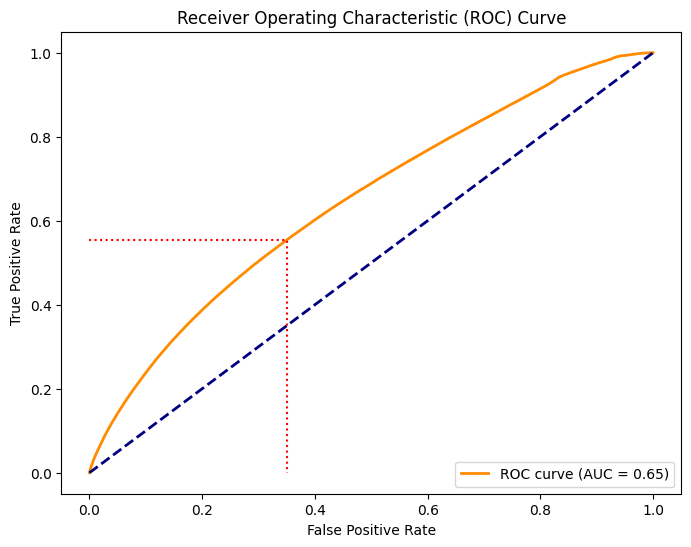

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

true_values = [(value == 5).astype(int) for value in train_weights.data]

predictions = model.predict(train_weights.row, train_weights.col, item_features=song_features_matrix, user_features=user_features_matrix)
mean_values = np.mean(predictions, axis=0)
std_values = np.std(predictions, axis=0)
standardized_predictions = (predictions - mean_values) / std_values
probability_values = 1 / (1 + np.exp(-standardized_predictions))

fpr, tpr, thresholds = roc_curve(true_values, probability_values)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Get am optimal thresdhold
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print('Optimal Threshold:', optimal_threshold)

selected_tpr = tpr[optimal_threshold_index]
selected_fpr = fpr[optimal_threshold_index]

plt.plot([0, selected_fpr, selected_fpr], [selected_tpr, selected_tpr, 0], color="red", linestyle="dotted")

# Apply the optimal threshold to make predictions
y_pred_optimal_threshold = (probability_values >= optimal_threshold).astype(int)

# Calculate and print accuracy with the optimal threshold
accuracy_optimal_threshold = accuracy_score(true_values, y_pred_optimal_threshold)
print('Accuracy with Optimal Threshold:', accuracy_optimal_threshold)

# Display confusion matrix
conf_matrix = confusion_matrix(true_values, y_pred_optimal_threshold)
print('Confusion Matrix:')
print(conf_matrix)

plt.show()

In [ ]:
# create sample test df
testset_user_ids = test_interactions.row
selected_user_id = user_inv_mapping[testset_user_ids[1000]]
selected_song_id = cleaned_df[cleaned_df.msno == selected_user_id].song_id.tolist()
user_mapping_ind = user_mapping[selected_user_id]
selected_song_inds = [song_mapping[song_id] for song_id in selected_song_id]
sample_test_df = cleaned_df[cleaned_df.msno==selected_user_id][['msno', 'song_id', 'target']]

# get prediction values
predictions = model.predict(user_mapping_ind, selected_song_inds, user_features=user_features_matrix, item_features=song_features_matrix)

# apply normalization & sigmoid function to prediction values
mean_values = np.mean(predictions, axis=0)
std_values = np.std(predictions, axis=0)
standardized_predictions = (predictions - mean_values) / std_values
probability_values = 1 / (1 + np.exp(-standardized_predictions))
probability_values = np.array([round(x, 2) for x in probability_values])
sample_test_df['predicted_prob'] = np.where(probability_values >= optimal_threshold, 5., 1.)

# compare result
matches = sample_test_df[sample_test_df.target==sample_test_df.predicted_prob].shape[0]
original = sample_test_df.shape[0]
print(f"matched:{matches} cases ({round(matches*100/original, 0)}%) vs original:{original} cases (100%)")


matched:456 cases (61.0%) vs original:752 cases (100%)
